In [2]:
%run heuristics_helper.ipynb
%run graph_helper.ipynb

In [3]:
import scipy
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from itertools import combinations
import time
from scipy.stats import beta
import pandas as pd
%matplotlib inline

In [9]:
objFunctions = [obj_disagreement, obj_polarization, obj_sum]

In [10]:
DISAGREEMENT = 0
POLARIZATION = 1
BOTH = 2

# Preprocessing

In [11]:
s_df = pd.read_csv('preprocess-twitter/opinion_twitter.txt', sep = '\t', header = None)
w_df = pd.read_csv('preprocess-twitter/edges_twitter.txt', sep = '\t', header = None)

In [12]:
# number of vertices
n = len(s_df[0].unique())

In [13]:
s_df.columns = ["ID", "Tick", "Opinion"]

In [14]:
# we take the opinion from the last appearance of the vertex ID in the list as its innate opinion
s = s_df.groupby(["ID"]).last()["Opinion"].values.reshape(n, 1)

In [15]:
# create adjacency matrix
G = np.zeros((n, n))
for i in range(1, n + 1):
    idx = np.where(w_df[0].values == i)[0]
    js = w_df[1].values[idx]
    for j in js:
        G[i-1, j-1] = 1
        G[j-1, i-1] = 1
        
    idx = np.where(w_df[1].values == i)[0]
    js = w_df[0].values[idx]
    for j in js:
        G[i-1, j-1] = 1
        G[j-1, i-1] = 1

In [16]:
L = scipy.sparse.csgraph.laplacian(G, normed=False)
A = np.linalg.inv(np.identity(n) + L)
m = num_edges(L, n)

(array([  1.,   1.,   1.,   3.,  16.,  81., 242., 177.,  25.,   1.]),
 array([0.0369267 , 0.12127673, 0.20562676, 0.28997679, 0.37432682,
        0.45867685, 0.54302688, 0.62737691, 0.71172694, 0.79607697,
        0.880427  ]),
 <a list of 10 Patch objects>)

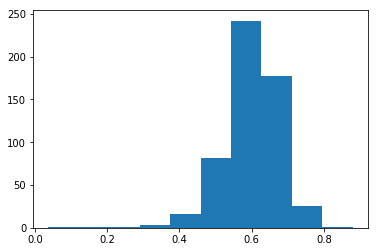

In [20]:
# distribution of innate opinions
plt.hist(s.reshape(n))

(array([361., 113.,  47.,  12.,   8.,   2.,   2.,   1.,   1.,   1.]),
 array([  1. ,  13.4,  25.8,  38.2,  50.6,  63. ,  75.4,  87.8, 100.2,
        112.6, 125. ]),
 <a list of 10 Patch objects>)

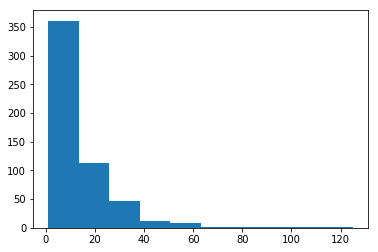

In [26]:
plt.hist(np.sort(G.sum(axis=0)))

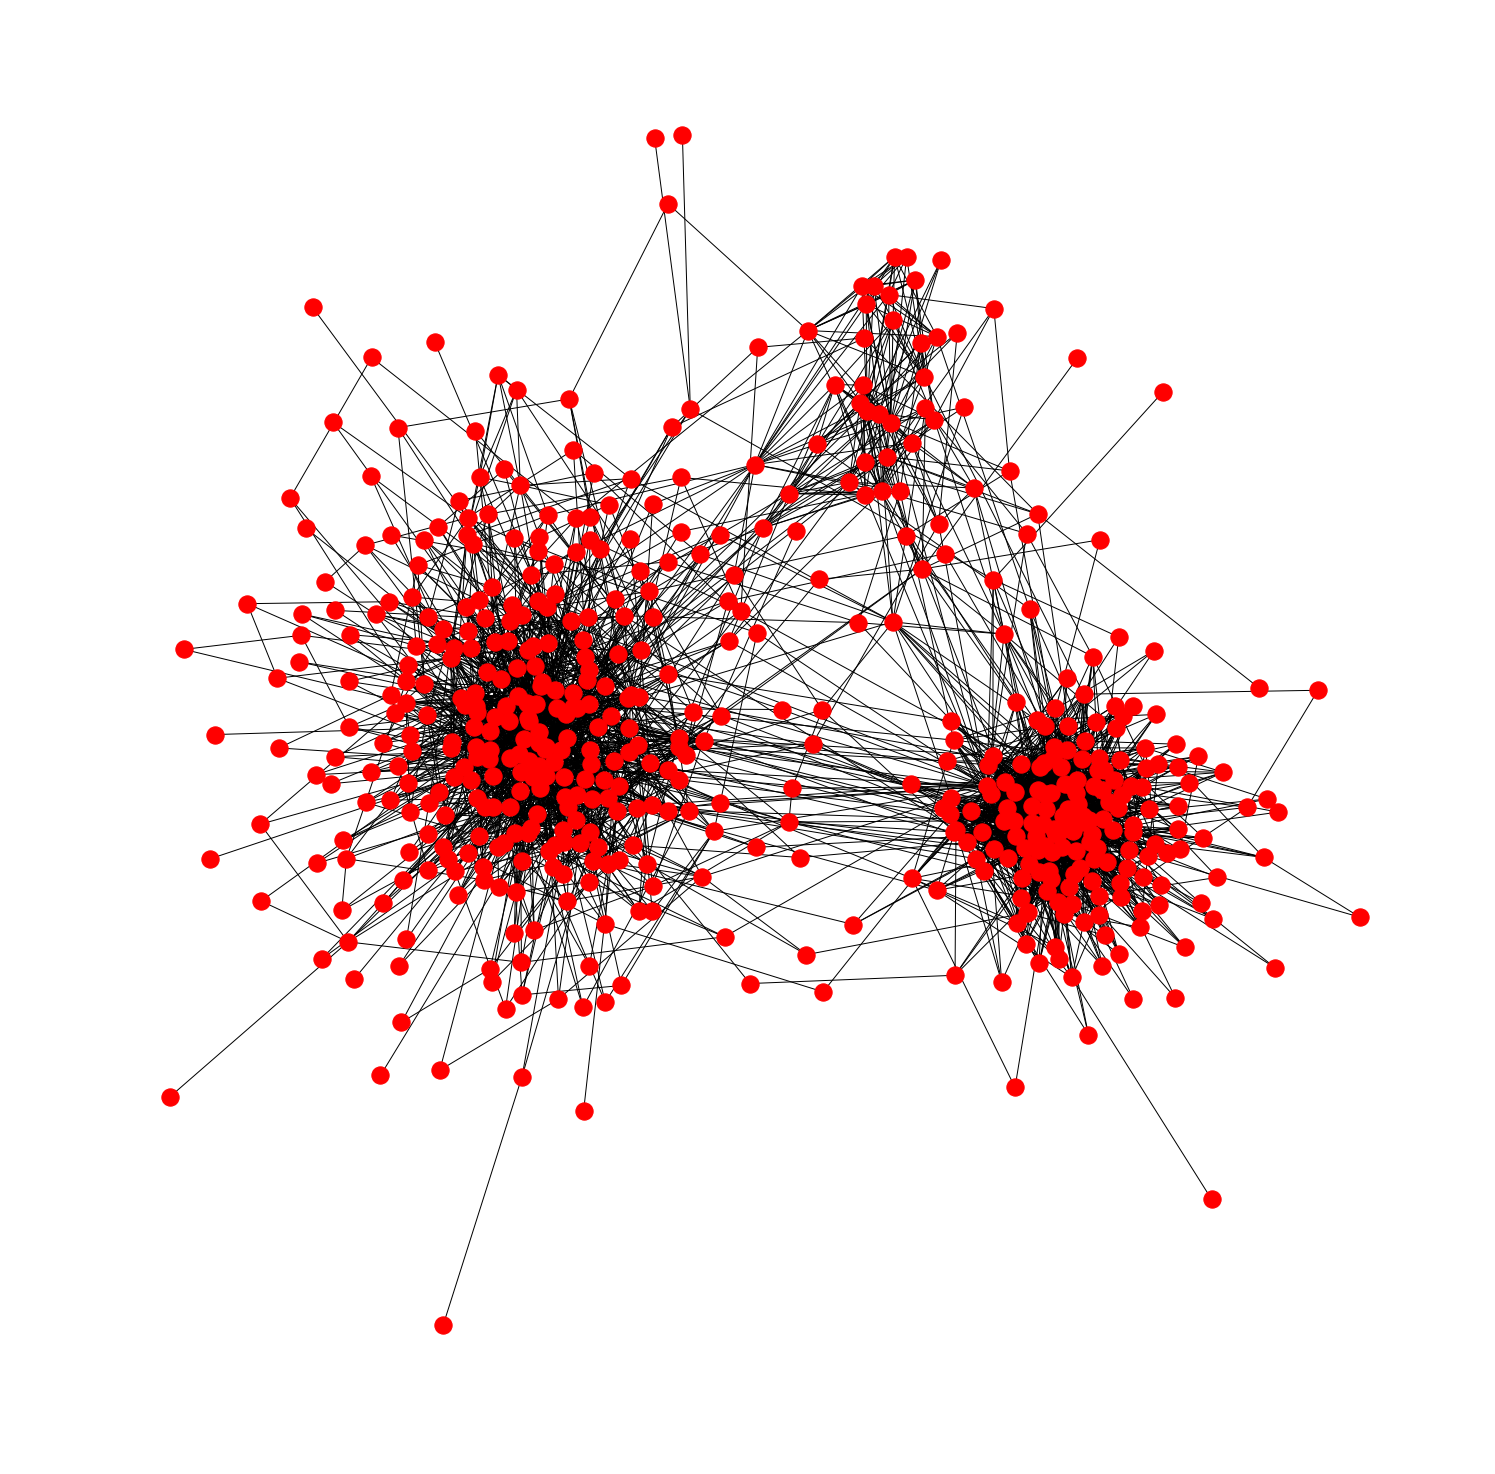

In [21]:
# what the twitter graph looks like 
nxG = nx.from_numpy_matrix(G)
plt.figure(figsize=(20, 20))
nx.draw(nxG)

# Testing: Disagreement

In [22]:
k = n

(s, s_greedy, max_obj_greedy_arr, s_local_innate, max_obj_local_innate_arr, s_random, 
            max_obj_random_arr, s_partial_random, max_obj_partial_random_arr, s_mean, max_obj_mean_arr,
            s_deg, max_obj_deg_arr, s_w_deg, max_obj_w_deg_arr, s_double_heuristic, 
            max_obj_double_heuristic_arr, original_obj) = compare_algorithms(n, k, G, DISAGREEMENT, opinions=s)
    

In [25]:
objs = [max_obj_greedy_arr, max_obj_mean_arr, max_obj_partial_random_arr, max_obj_random_arr, 
       max_obj_local_innate_arr, max_obj_deg_arr, max_obj_w_deg_arr, max_obj_double_heuristic_arr]

df = pd.DataFrame(objs)
df = df.transpose()
df.columns = labels

In [26]:
df.to_pickle("./twitter_pkl/disagreement.pkl")

# Testing: Polarization

In [27]:
(s, s_greedy, max_obj_greedy_arr, s_local_innate, max_obj_local_innate_arr, s_random, 
            max_obj_random_arr, s_partial_random, max_obj_partial_random_arr, s_mean, max_obj_mean_arr,
            s_deg, max_obj_deg_arr, s_w_deg, max_obj_w_deg_arr, s_double_heuristic, 
            max_obj_double_heuristic_arr, original_obj) = compare_algorithms(n, k, G, POLARIZATION, opinions=s)
    

In [30]:
objs = [max_obj_greedy_arr, max_obj_mean_arr, max_obj_partial_random_arr, max_obj_random_arr, 
       max_obj_local_innate_arr, max_obj_deg_arr, max_obj_w_deg_arr, max_obj_double_heuristic_arr]

df = pd.DataFrame(objs)
df = df.transpose()
df.columns = labels

In [31]:
df.to_pickle("./twitter_pkl/polarization.pkl")

# Testing: Sum

In [39]:
(s, s_greedy, max_obj_greedy_arr, s_local_innate, max_obj_local_innate_arr, s_random, 
            max_obj_random_arr, s_partial_random, max_obj_partial_random_arr, s_mean, max_obj_mean_arr,
            s_deg, max_obj_deg_arr, s_w_deg, max_obj_w_deg_arr, s_double_heuristic, 
            max_obj_double_heuristic_arr, original_obj) = compare_algorithms(n, k, G, BOTH, opinions=s)
    

In [42]:
objs = [max_obj_greedy_arr, max_obj_mean_arr, max_obj_partial_random_arr, max_obj_random_arr, 
        max_obj_local_innate_arr, max_obj_deg_arr, max_obj_w_deg_arr, max_obj_double_heuristic_arr]

df = pd.DataFrame(objs)
df = df.transpose()
df.columns = labels

In [43]:
df.to_pickle("./twitter_pkl/sum.pkl")